In [192]:
using DelimitedFiles
using Plots
using Statistics
using LinearAlgebra
using Interpolations

In [193]:
pyplot()

Plots.PyPlotBackend()

In [194]:
fileName = "exp02-sa.log"
name = "exp02"
data = readdlm(fileName,' ',skipstart=1)

workTimeInd = 1:size(data)[1];
workChanInd = [1;5:6;9:10];

In [195]:
time_old = data[:,workChanInd[1]];
time_old .-= time_old[1];
spec_old = data[:,workChanInd[2:end]];

## Анализ шумов


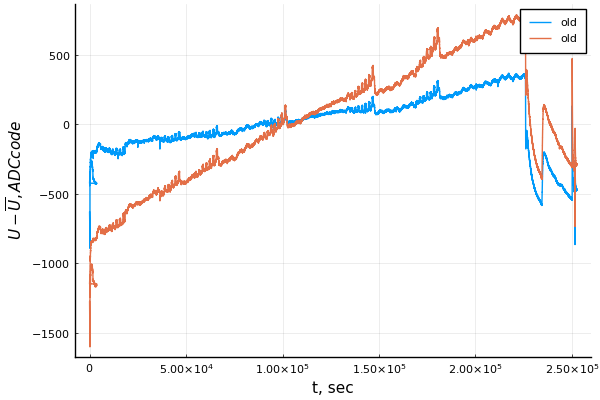

In [196]:
plot(time_old[:],spec_old[:,3] .- mean(spec_old[:,3]),xlabel = "t, sec",ylabel = "\$ U - \\overline{U},  ADC code\$",labels = "old")
plot!(time_old[:],spec_old[:,4].- mean(spec_old[:,4]), labels = "old")

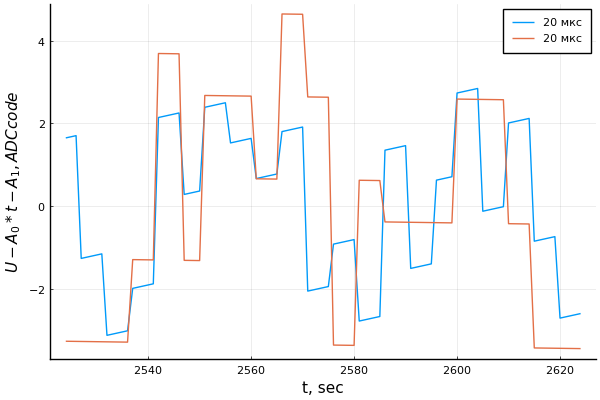

In [219]:
ind = 2525:2625;

x_old = [time_old[ind] ones(size(ind))]
A_old = x_old\spec_old[ind,3]
A1_old = x_old\spec_old[ind,4]
y_old = spec_old[ind,3].-x_old*A_old
y1_old = spec_old[ind,4].-x_old*A1_old
plot(time_old[ind],spec_old[ind,3].-x_old*A_old,xlabel = "t, sec",ylabel = "\$ U - A_0*t-A_1, ADC code \$", labels = "20 мкс")
plot!(time_old[ind],spec_old[ind,4].-x_old*A1_old,xlabel = "t, sec",ylabel = "\$ U - A_0*t-A_1, ADC code \$", labels = "20 мкс")

In [220]:
std(y_old)

1.8740180422283885

In [199]:
cor(y_old, y1_old)

0.5389813590299403

## Анализ концетрационной зависимости

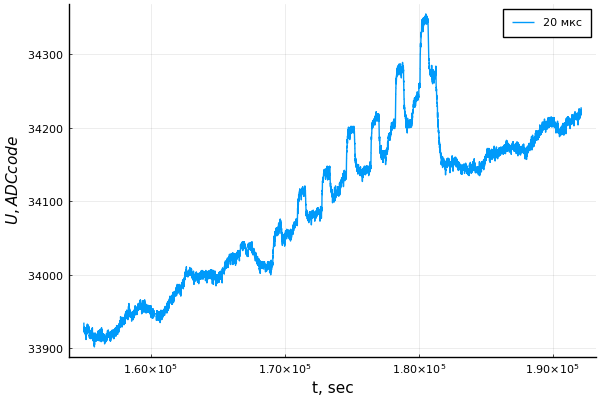

In [223]:
ind = (155019 .< time_old) .& (192123 .> time_old)

plot(time_old[ind],spec_old[ind,4],xlabel = "t, sec",ylabel = "\$ U, ADC code \$", labels = "20 мкс")
# plot!(time_old[ind],spec_old[ind,4],xlabel = "t, sec",ylabel = "\$ U, ADC code \$", labels = "20 мкс")
# plot!(time_old[ind],spec_old[ind,4].-x_old*A1_old,xlabel = "t, sec",ylabel = "\$ U - A_0*t-A_1, ADC code \$", labels = "20 мкс")



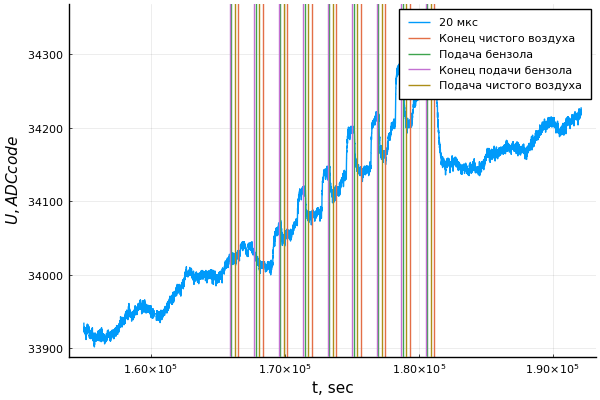

In [232]:
ind_end = findfirst(time_old .> 181277)


trans_time1  = 0.5;
trans_time2  = 8;
trans_time3  = 4;
trans_time4  = 2;

air1_time = 10.15;
air2_time = 10.15;
gas_time = 10.15;
sum_time = air1_time + air2_time + gas_time
test = collect(0:sum_time:8*sum_time)
air2_end_ind = [findfirst(time_old .> 181277 - i.*60 ) for i = test]
gas_end_ind = [findfirst(time_old .> 181277 - (i + air2_time).*60 ) for i = test]
gas_start_ind = [findfirst(time_old .> 181277 - (i + air2_time + gas_time).*60 ) for i = test]
air1_start_ind = [findfirst(time_old .> 181277 - (i + air2_time + gas_time + air1_time).*60 ) for i = test]

air2_end_st_ind = [findfirst(time_old .> 181277 - (i .+ trans_time4).*60) for i = test]
gas_end_st_ind = [findfirst(time_old .> 181277 - (i + air2_time + trans_time1).*60 ) for i = test]
gas_start_st_ind = [findfirst(time_old .> 181277 - (i + air2_time + gas_time - trans_time2).*60 ) for i = test]
air2_start_st_ind = [findfirst(time_old .> 181277 - (i+ air2_time - trans_time3).*60 ) for i = test]

plot(time_old[ind],spec_old[ind,4],xlabel = "t, sec",ylabel = "\$ U, ADC code \$", labels = "20 мкс")
vline!(time_old[air2_end_st_ind],labels = "Конец чистого воздуха")
vline!(time_old[gas_end_st_ind],labels = "Подача бензола")
vline!(time_old[gas_start_st_ind],labels = "Конец подачи бензола")
vline!(time_old[air2_start_st_ind],labels = "Подача чистого воздуха")

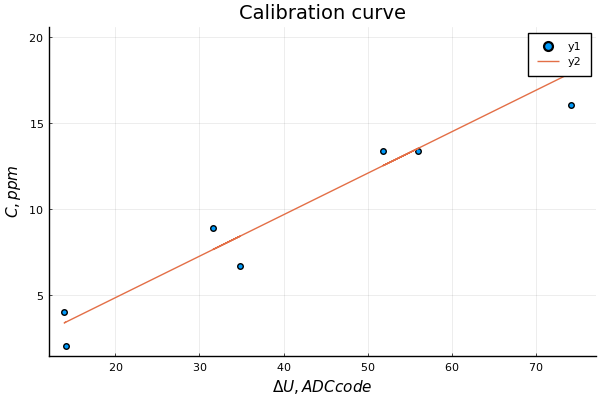

In [233]:
air_level = [ mean(spec_old[air2_start_st_ind[i]:air2_end_st_ind[i],4]) for i =1:8]
gas_level = [ mean(spec_old[gas_start_st_ind[i]:gas_end_st_ind[i],4]) for i =1:8]

sig = gas_level - air_level

flows = [40,50,60,60,90,120,200,400];
conc  = 2*400 ./flows
scatter(sig,conc,xlabel = "\$ \\Delta U, ADC code \$",ylabel = "\$ C, ppm \$", title = "Calibration curve")

a = sig[1:8]\conc[1:8]

plot!(sig,a.*sig)

## Минимально детектируемя концетрация, ppm

In [234]:
a*std(y_old)*3

1.356020117320043

## Минимально детектируемя концетрация по минимальным шумам, ppm

In [231]:
a*std(y_old)*3 ./1.5

0.906522604575733